In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !wget -O data.tar.gz https://husteduvn-my.sharepoint.com/:u:/g/personal/thanh_lt163705_sis_hust_edu_vn/ER-r_LgP529LkkK0FqGwbBMBm76hhw3Z8s__HlOJPAx3Hg?download=1
# !tar -zxvf data.tar.gz

!wget -O deepfashion.tar.gz https://husteduvn-my.sharepoint.com/:u:/g/personal/thanh_lt163705_sis_hust_edu_vn/EQ_uFyOgyk5JvzcjFrlOo6ABEkH1vxHNGH5ACnDIApS7Yw?download=1
!tar -zxvf deepfashion.tar.gz
!unzip img.zip

Streaming output truncated to the last 5000 lines.
  inflating: img/Woven_Dolphin_Shorts/img_00000028.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000029.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000030.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000031.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000032.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000033.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000034.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000035.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000036.jpg  
  inflating: img/Woven_Dolphin_Shorts/img_00000037.jpg  
   creating: img/Woven_Drawstring_Joggers/
  inflating: img/Woven_Drawstring_Joggers/img_00000001.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000002.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000003.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000004.jpg  
  inflating: img/Woven_Drawstring_Joggers/img_00000005.jpg  
  inflating: img/Woven_Drawstri

In [0]:
import warnings
import fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.basic_train import *
from fastai.vision.learner import *
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [0]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(42)

In [0]:
# path = Path('data/fashion_data')

In [0]:
# load data from splited folder
# data = ImageDataBunch.from_folder(
#     path=path,
#     train='train',
#     test='test',
#     valid_pct=0.2,
#     seed=42,
#     bs=16,
#     ds_tfms=get_transforms(flip_vert=True, max_warp=0.1, max_zoom=1.15, max_rotate=45.),
#     size=224,
#     num_workers=os.cpu_count(),
# ).normalize(imagenet_stats)
# data.train_dl = data.train_dl.new(drop_last=False)

# data_test = ImageDataBunch.from_folder(
#     path=path,
#     train='test',
#     test='train',
#     valid_pct=0,
#     seed=42,
#     bs=64,
#     ds_tfms=get_transforms(flip_vert=True, max_warp=0.1, max_zoom=1.15, max_rotate=45.),
#     size=224,
#     num_workers=os.cpu_count(),
#     classes=data.classes,
# ).normalize(imagenet_stats)
# data_test.train_dl = data_test.train_dl.new(shuffle=False, drop_last=False)
# data.test_dl = data_test.train_dl

In [0]:
train_df = pd.read_csv('csv/train_eval.csv', sep='\t')
test_df = pd.read_csv('csv/test.csv', sep='\t')
src = (
    ImageList.from_df(
        train_df,
        path='.',
        cols='image_name',)
    .split_from_df(col='is_valid')
    .label_from_df(cols='category')
)
data = (
    src.transform(get_transforms(flip_vert=True, max_warp=0.1, max_zoom=1.15, max_rotate=45.), size=150)
    .databunch(num_workers=os.cpu_count(), bs=128,)
    .normalize(imagenet_stats)
)
test = ImageDataBunch.from_df(
    df=test_df,
    label_col='category',
    fn_col='image_name',
    path='.',
    folder='.',
    valid_pct=0.,
    ds_tfms=get_transforms(flip_vert=True, max_warp=0.1, max_zoom=1.15, max_rotate=45.),
    size=150,
    bs=256,
    num_workers=os.cpu_count(),
    seed=42,
).normalize(imagenet_stats)
data.test_dl = test.train_dl

assert data.classes == test.classes, 'not same classes'

In [0]:
data.c, data.classes

(46,
 ['Anorak',
  'Blazer',
  'Blouse',
  'Bomber',
  'Button-Down',
  'Caftan',
  'Capris',
  'Cardigan',
  'Chinos',
  'Coat',
  'Coverup',
  'Culottes',
  'Cutoffs',
  'Dress',
  'Flannel',
  'Gauchos',
  'Halter',
  'Henley',
  'Hoodie',
  'Jacket',
  'Jeans',
  'Jeggings',
  'Jersey',
  'Jodhpurs',
  'Joggers',
  'Jumpsuit',
  'Kaftan',
  'Kimono',
  'Leggings',
  'Onesie',
  'Parka',
  'Peacoat',
  'Poncho',
  'Robe',
  'Romper',
  'Sarong',
  'Shorts',
  'Skirt',
  'Sweater',
  'Sweatpants',
  'Sweatshorts',
  'Tank',
  'Tee',
  'Top',
  'Trunks',
  'Turtleneck'])

In [0]:
assert data.classes == test.classes

In [0]:
path = 'drive/My Drive/models/resnet'
top_3_accuracy = partial(top_k_accuracy, k=3); top_3_accuracy.__name__ = 'top_3_accuracy'
top_5_accuracy = partial(top_k_accuracy, k=5); top_5_accuracy.__name__ = 'top_5_accuracy'

learn = cnn_learner(
    data, models.resnet50, metrics=[accuracy, top_3_accuracy, top_5_accuracy], path=path,
)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(30, callbacks=[
        SaveModelCallback(learn, monitor='accuracy', every='improvement', name='res50_sz150_best_stage1'),
        EarlyStoppingCallback(learn, monitor='valid_loss', min_delta=0.01, patience=10)
    ])

epoch,train_loss,valid_loss,accuracy,top_3_accuracy,top_5_accuracy,time
0,2.322696,1.777826,0.499250,0.742625,0.841825,21:09
1,1.897966,1.602979,0.525800,0.768125,0.861175,21:10
2,1.765294,1.528863,0.548575,0.784400,0.874450,21:03
3,1.666068,1.480652,0.560150,0.794375,0.883000,20:48
4,1.614097,1.442931,0.568625,0.801800,0.886350,21:01
5,1.549398,1.403547,0.584650,0.810100,0.892375,20:58
6,1.506668,1.381238,0.589250,0.813825,0.896700,21:01
7,1.493236,1.367166,0.594325,0.817150,0.898250,21:14
8,1.468777,1.350892,0.598600,0.822050,0.899950,21:11
9,1.443478,1.335034,0.606475,0.824575,0.903475,21:11


Better model found at epoch 0 with accuracy value: 0.49924999475479126.
Better model found at epoch 1 with accuracy value: 0.5257999897003174.
Better model found at epoch 2 with accuracy value: 0.5485749840736389.
Better model found at epoch 3 with accuracy value: 0.5601500272750854.
Better model found at epoch 4 with accuracy value: 0.5686249732971191.
Better model found at epoch 5 with accuracy value: 0.5846499800682068.
Better model found at epoch 6 with accuracy value: 0.5892500281333923.
Better model found at epoch 7 with accuracy value: 0.5943250060081482.
Better model found at epoch 8 with accuracy value: 0.5985999703407288.
Better model found at epoch 9 with accuracy value: 0.6064749956130981.
Better model found at epoch 10 with accuracy value: 0.6083499789237976.
Better model found at epoch 11 with accuracy value: 0.6130250096321106.
Better model found at epoch 12 with accuracy value: 0.6143249869346619.
Better model found at epoch 13 with accuracy value: 0.6203250288963318.
B

In [0]:
# resuming training
learn.fit_one_cycle(30, start_epoch=27, callbacks=[
        SaveModelCallback(learn, monitor='accuracy', every='improvement', name='res50_sz150_best_stage1'),
        EarlyStoppingCallback(learn, monitor='valid_loss', min_delta=0.01, patience=10)
    ])

Loaded res50_sz150_best_stage1_26


epoch,train_loss,valid_loss,accuracy,top_3_accuracy,top_5_accuracy,time
27,1.258214,1.228526,0.637875,0.847275,0.914925,25:12
28,1.292033,1.225603,0.638425,0.847550,0.915675,24:08
29,1.321065,1.230727,0.637200,0.846475,0.914975,22:58


Better model found at epoch 27 with accuracy value: 0.6378750205039978.
Better model found at epoch 28 with accuracy value: 0.6384249925613403.


In [0]:
learn.load('res50_sz150_best_stage1')
learn.validate(learn.data.test_dl)

[1.2925326, tensor(0.6154), tensor(0.8315), tensor(0.9061)]

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()

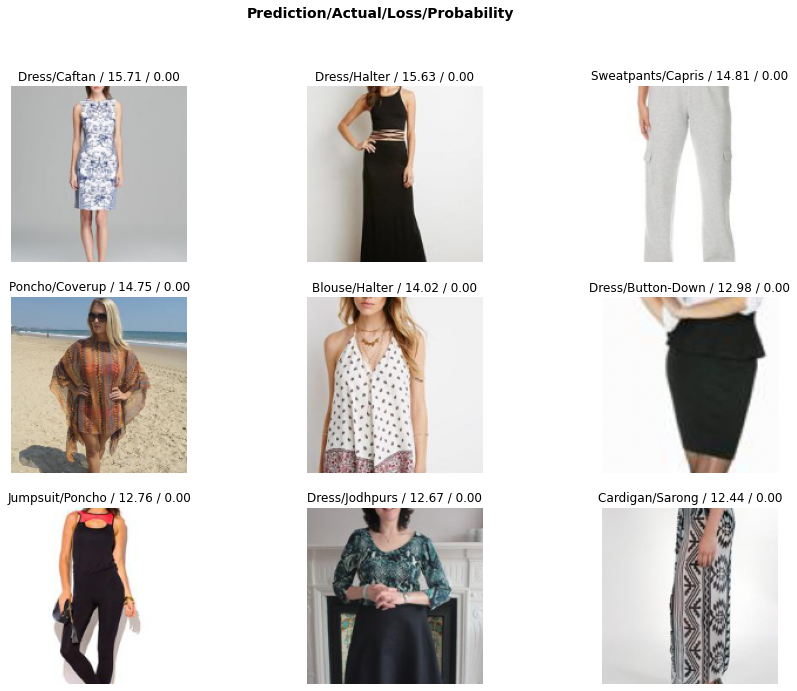

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

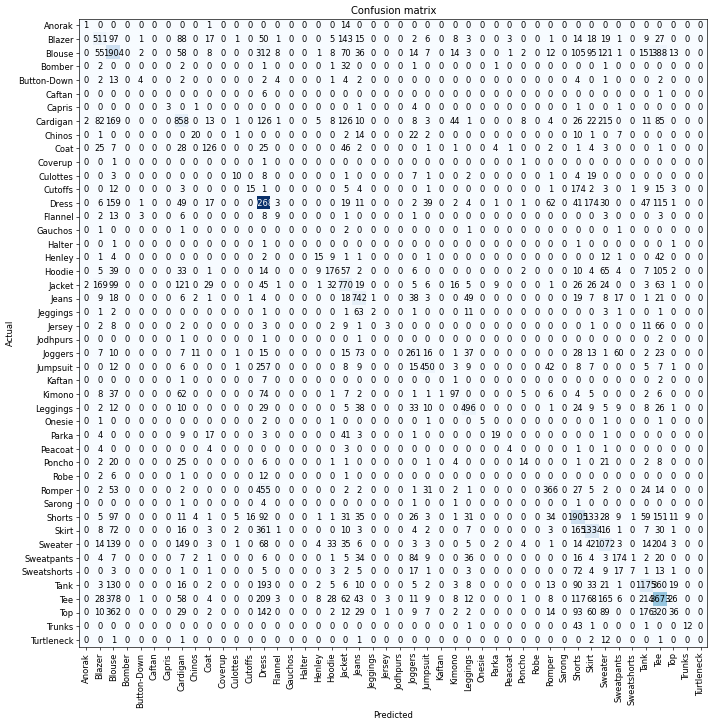

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=50)

[('Romper', 'Dress', 455),
 ('Blouse', 'Tee', 388),
 ('Tee', 'Blouse', 378),
 ('Top', 'Blouse', 362),
 ('Skirt', 'Dress', 361),
 ('Tank', 'Tee', 360),
 ('Top', 'Tee', 320),
 ('Blouse', 'Dress', 312),
 ('Jumpsuit', 'Dress', 257),
 ('Cardigan', 'Sweater', 215),
 ('Tee', 'Tank', 214),
 ('Tee', 'Dress', 209),
 ('Sweater', 'Tee', 204),
 ('Tank', 'Dress', 193),
 ('Top', 'Tank', 176),
 ('Cutoffs', 'Shorts', 174),
 ('Dress', 'Skirt', 174),
 ('Cardigan', 'Blouse', 169),
 ('Jacket', 'Blazer', 169),
 ('Skirt', 'Shorts', 165),
 ('Tee', 'Sweater', 165),
 ('Dress', 'Blouse', 159),
 ('Blouse', 'Tank', 151),
 ('Shorts', 'Tee', 151),
 ('Sweater', 'Cardigan', 149),
 ('Blazer', 'Jacket', 143),
 ('Top', 'Dress', 142),
 ('Sweater', 'Blouse', 139),
 ('Shorts', 'Skirt', 133),
 ('Tank', 'Blouse', 130),
 ('Cardigan', 'Dress', 126),
 ('Cardigan', 'Jacket', 126),
 ('Blouse', 'Sweater', 121),
 ('Jacket', 'Cardigan', 121),
 ('Tee', 'Shorts', 117),
 ('Dress', 'Tee', 115),
 ('Blouse', 'Shorts', 105),
 ('Hoodie', 'Te

epoch,train_loss,valid_loss,accuracy,top_3_accuracy,top_5_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06
Min loss divided by 10: 6.31E-08


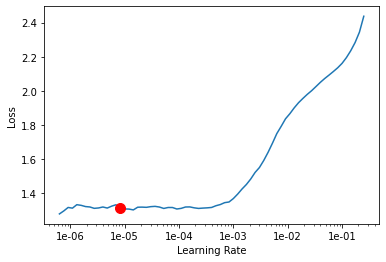

In [0]:
learn.load('res50_sz150_best_stage1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(30, max_lr=slice(1e-6, 1e-4), callbacks=[
        SaveModelCallback(learn, monitor='accuracy', every='improvement', name='res50_sz150_best_stage2'),
        EarlyStoppingCallback(learn, monitor='valid_loss', min_delta=0.01, patience=10)
    ])

epoch,train_loss,valid_loss,accuracy,top_3_accuracy,top_5_accuracy,time
0,1.277329,1.225217,0.638725,0.848225,0.916450,24:00
1,1.276232,1.223258,0.639125,0.848425,0.916225,23:53
2,1.289095,1.217533,0.640475,0.848925,0.916500,24:02
3,1.256423,1.210993,0.642850,0.850600,0.918150,25:31
4,1.252584,1.205039,0.644325,0.852550,0.918150,25:16
5,1.232703,1.196478,0.646450,0.854300,0.920100,25:14
6,1.233945,1.191805,0.646500,0.855525,0.920125,24:54
7,1.243873,1.172866,0.653800,0.859150,0.923175,25:29
8,1.213913,1.166996,0.655475,0.859425,0.923575,26:32
9,1.205734,1.159122,0.658175,0.860100,0.923250,26:43


Better model found at epoch 0 with accuracy value: 0.6387249827384949.
Better model found at epoch 1 with accuracy value: 0.6391249895095825.
Better model found at epoch 2 with accuracy value: 0.6404749751091003.
Better model found at epoch 3 with accuracy value: 0.6428499817848206.
Better model found at epoch 4 with accuracy value: 0.6443250179290771.
Better model found at epoch 5 with accuracy value: 0.6464499831199646.
Better model found at epoch 6 with accuracy value: 0.6464999914169312.
Better model found at epoch 7 with accuracy value: 0.6538000106811523.
Better model found at epoch 8 with accuracy value: 0.6554750204086304.
Better model found at epoch 9 with accuracy value: 0.658174991607666.
Better model found at epoch 10 with accuracy value: 0.6589999794960022.


In [0]:
# resuming stage2
learn.fit_one_cycle(30, start_epoch=11, max_lr=slice(1e-6, 1e-4), callbacks=[
        SaveModelCallback(learn, monitor='accuracy', every='improvement', name='res50_sz150_best_stage2'),
        EarlyStoppingCallback(learn, monitor='valid_loss', min_delta=0.01, patience=10)
    ])

Loaded res50_sz150_best_stage2_10


epoch,train_loss,valid_loss,accuracy,top_3_accuracy,top_5_accuracy,time
11,1.186053,1.146545,0.660600,0.863000,0.925625,33:48
12,1.181053,1.147417,0.661650,0.862850,0.925225,34:32
13,1.161294,1.143286,0.663150,0.863550,0.925750,33:14
14,1.162411,1.143171,0.661950,0.863775,0.926000,33:17
15,1.152214,1.142741,0.663375,0.863875,0.925700,33:11
16,1.161726,1.141401,0.662850,0.864750,0.925950,33:08
17,1.134546,1.141456,0.663200,0.864225,0.925850,33:10
18,1.141839,1.142149,0.662875,0.864375,0.925475,33:10
19,1.150955,1.142084,0.662900,0.863600,0.926175,33:10
20,1.142558,1.141874,0.663575,0.863650,0.925825,33:09


Better model found at epoch 11 with accuracy value: 0.6606000065803528.
Better model found at epoch 12 with accuracy value: 0.6616500020027161.
Better model found at epoch 13 with accuracy value: 0.6631500124931335.
Better model found at epoch 15 with accuracy value: 0.6633750200271606.
Better model found at epoch 20 with accuracy value: 0.6635749936103821.
Epoch 22: early stopping


In [0]:
learn.load('res50_sz150_best_stage2')
learn.validate(learn.data.test_dl)

[1.2014135, tensor(0.6462), tensor(0.8491), tensor(0.9183)]

epoch,train_loss,valid_loss,accuracy,top_3_accuracy,top_5_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


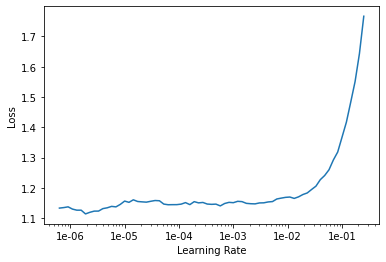

In [0]:
learn.load('res50_sz150_best_stage2')
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(20, max_lr=slice(1e-7,1e-5), callbacks=[
        SaveModelCallback(learn, monitor='accuracy', every='improvement', name='res50_sz150_best_stage3'),
        EarlyStoppingCallback(learn, monitor='valid_loss', min_delta=0.01, patience=10)
    ])

epoch,train_loss,valid_loss,accuracy,top_3_accuracy,top_5_accuracy,time
0,1.169070,1.141971,0.663050,0.864175,0.926325,28:54
1,1.162933,1.143552,0.661825,0.863475,0.925625,28:32
2,1.162228,1.139586,0.663025,0.864300,0.925900,27:33
3,1.162807,1.139856,0.663950,0.864700,0.926250,27:48
4,1.165626,1.140977,0.662600,0.864475,0.925925,27:39


Better model found at epoch 0 with accuracy value: 0.6630499958992004.
Better model found at epoch 3 with accuracy value: 0.6639500260353088.


In [0]:
learn.save('stage1')

In [0]:
learn.load('best_stage2')
learn.validate(learn.data.test_dl)

[1.3234252, tensor(0.6837)]

In [0]:
!cp data/fashion_data/models/best_stage1.pth drive/My\ Drive/

In [0]:
learn.fit_one_cycle(50, max_lr=slice(1e-7, 1e-6), callbacks=[
        SaveModelCallback(learn, monitor='accuracy', every='improvement', name='best_stage3'),
        EarlyStoppingCallback(learn, monitor='valid_loss', min_delta=0.01, patience=10)
    ])

epoch,train_loss,valid_loss,accuracy,time
0,0.119979,1.131441,0.696903,01:13
1,0.114453,1.135313,0.692478,01:13
2,0.107251,1.132559,0.694690,01:13
3,0.107343,1.141396,0.688053,01:14
4,0.108523,1.124844,0.694690,01:13
5,0.114667,1.142729,0.688053,01:12
6,0.103788,1.136783,0.685841,01:15
7,0.119256,1.135237,0.688053,01:13
8,0.121673,1.156667,0.692478,01:13
9,0.128363,1.128747,0.699115,01:15


Better model found at epoch 0 with accuracy value: 0.6969026327133179.
Better model found at epoch 9 with accuracy value: 0.6991150379180908.
Epoch 11: early stopping


In [0]:
learn.load('best_stage3')
learn.validate(learn.data.test_dl)

[1.4118166, tensor(0.6643)]

In [0]:
preds = learn.get_preds(DatasetType.Test)

In [0]:
len(preds[1]), len(learn.data.test_ds.y.items)

(566, 566)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(torch.argmax(preds[0], dim=1).tolist(), learn.data.test_ds.y.items.tolist())

0.6484098939929329